# Character-level Convolutional Network
In this notebook we train and evaluate the performance of a convolutional neural network in the task of detecting misinformation in WhatsApp texts.

In [38]:
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from utils import getTestMetrics
from imblearn.over_sampling import SMOTE 
%matplotlib inline
sns.set(style="whitegrid")

In [2]:
base = 2018
filepath = 'data/' + str(base) + '/fakeWhatsApp.BR_' + str(base) + '.csv'
df = pd.read_csv(filepath)
df.head(5)

/home/cabral/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,date,hour,ddi,country,country_iso3,ddd,state,group,midia,url,characters,words,viral,sharings,text,misinformation
0,3631133147603888180,01/08/18,13:13,55,BRASIL,BRA,17,São Paulo,2018_1,1,0,25,4,0,1,<Arquivo de mídia oculto>,0
1,3631133147603888180,01/08/18,13:24,55,BRASIL,BRA,17,São Paulo,2018_1,0,0,58,9,1,2,O Bolsonaro tem que estar preparado pra respon...,0
2,3631133147603888180,01/08/18,13:24,55,BRASIL,BRA,17,São Paulo,2018_1,1,0,25,4,0,1,<Arquivo de mídia oculto>,0
3,-4391661641377612003,01/08/18,13:28,55,BRASIL,BRA,13,São Paulo,2018_1,0,0,5,1,0,1,Boaaa,0
4,-4391661641377612003,09/08/18,14:46,55,BRASIL,BRA,13,São Paulo,2018_1,1,0,25,4,0,1,<Arquivo de mídia oculto>,0


In [3]:
#removing duplicates
df = df.drop_duplicates(subset=['text'])
#texts
texts = df[df['midia']==0]['text']
#target
y = df[df['midia']==0]['misinformation']

# Char vocabulary, encoding and decoding

In [4]:
txt_list = list(texts)
txt_str = " ".join(txt_list)
#word_list = msg_str.split()
char_list = list(txt_str)
vocab_set = set(char_list)
features = len(vocab_set)
print(features)

1304


In [5]:
for v in list(vocab_set):
    print(v, end = ' ')

∠ S 💯 📕 💦 🤛 🚂 🚹 じ 💪 ⇩ 🕥 💤 ù 🤢 原 👕 📙 а ⠒ ι 🚢 👫 🔈 ┻ 🔲 ב Ü 🖐 💕 p 🛬 🌛 💟 ‿ 4 📐 ິ ⚰ 👪 🛠 🐮 👉 À ō ◡ 🌅 👆 🍲 🚝 ⏳ ╱ υ י 😺 🍁 💄 Ù 🍓 を 🔜 🏹 🙂 三 📛 • ' /  ⠧ 🙍 🐈 💏 🍺 🎊 ā 🚛 ( 🇶 ☎ 🎨 É 🛫 厂 💧 🎫 ⠢ 🍼 ヽ Ä 🔉 ⠄ 😩 😋 🐻 🎸 🍗 💓 😶 🏠 👁 ⣭ ↪ 🐎 👷 🚒 😰 ñ 場 💍 🔋 😙 💨 ✍ ☻ ▫ 🍂 🖌 😀 Á ⛪ . ט 🇿 に ➥ ⬇ 😏 🚚 ⚓ 示 🏴 🧠 🐷 ⬆ z 🚵 🛶 🖤 ⠻ 🥗 🖋 🎟 | C 🥚 📰 🇱 🌫 🍔 👺 2 🔴 🧖 ま ⠁ 🏊 📡 言 	 🤖 🧡 🍵 u ; 🦌 ® # わ ┣ 👮 👸 ĺ a 😨 🏷 喜 I 🗨 🇺 👰 ⤵ ◼ k 🌼 🤗 🤘 🍇 ú 😷 🌎 ⎠ 📚 👤 何 📖 ・ 🛵 ö 💭 t 💷 👎 $ 💝 🔑 🌳 🚤 ツ 🧒 ė 😌 ↖ が ☃ 🔊 ̷ 🆖 ⃣ 第 🏥 h Α 🎇 🍖 ⠋ 😞 🦋 🎞 そ ⣤ 🥟 🥑 ό 😡 🚩 ✠ 😉 ━ 🆗 π ⡻ ⭐ b 🛍 🕕 ┗ 🎙 ͡ l y 😴 ➖ 🐽 D 合 🙉 ❗ ¿ レ G 👥 🤰 🎾 ⡄ 😱 ⣈ 😊 察 全 @ 8 🏦 🔎 ⣠ 🛩 💉 © と 🛇 🐂 式 🐥 🚜 ✅ 😔 💌 👬 ε 協 ★ χ 9 🖥 〰 💡 😖 Q ❪ » 🥞 👜 à 私 Ă 🌞 ✳ ģ 🚖 👂 🇫 🥣 🐖 🏳 💣 Ɨ 卐 🗣 証 🕖 ☺ ີ 🗓 ຼ ⠸ 💸 ו 🥘 お ❇ 👍 ​ 🤴 _ 🌺 🎋 🌿 á 🍫 💼 🍶 ? 介 🙌 🔃 🍘 い 🛌 🎼 ✂ 🏚 X 😃 【 ⌚ 👖 V 👞 🏎 🍙 📷 は φ ᒪ 🦇 💽 🇴 3 づ 💶 🌟 📄 ⚒  Â 🏩 ­ 💒 🏾 🏽 👐 😄 る ル 🛡 θ ┓ ⛄ 😮 x 《 😪 😻 🏼 😆 🗻 í ̧ 📻 ☘ v 🅿 🥈 🔮 💲 🇨 ē 🐱 🦀 % 🤜 💎 🔕 ⛴ 😎 🤠 È  🤹 👚 警 🤯 👳 � 🍦 🍏 ➜ 🌜 6 👧 🐀 🔽 🕴 ☢ ⢻ ‭ ◀ F J ￼ 🎂 🇳 📏 💬 👟 、 🌨  🎩 ⡀ ה M 🐇 & 完 🤭 🕊 Y 🙏 ┳ 🏅  ― 👠 ά 😳 🐸 🚮 幺 Ô ¤ 📈 👔 🦁 🥂 🐛 ⢾ 🌾 ѕ 🙄 η て ﻿ 💔 < ⣿ 🌪 ⛱ 🔬 ü 🎯 🚡 🤲 ⏩ ∴ 🔘 ♠ 🌩  ╩ 

In [6]:
#dictionaries to encode char to indexes and indexes to char
char2Code = {}
code2Char = {0: ''}

i=1
for char in list(vocab_set):
    char2Code[char] = i
    code2Char[i] = char
    i+=1

In [7]:
#enconding and decoding fu
def vectorize(text, char2Code = char2Code):
    '''
    Enconding function: converts an string in code
    Input: string
    Output: coded string
    '''
    #text = text.lower()
    text_list = list(text)
    text_vector = []
    for token in text_list:
        if token in char2Code:
            code = char2Code[token]
            text_vector.append(code)
        else:
            text_vector.append(0)
    return(text_vector)

def unvectorize(vec, code2Char = code2Char):
    '''
    Decoding function: converts code in string
    Input: coded index list
    Output: string
    '''
    text = ''
    for i in vec:
        text += code2Char[i]
    return text
        
v = vectorize('This is a test!!! Gotcha? 🌝')
w = unvectorize(v)
print(v)
print(w)

[556, 222, 827, 1218, 598, 827, 1218, 598, 174, 598, 201, 758, 1218, 201, 523, 523, 523, 598, 261, 1178, 201, 574, 222, 174, 342, 598, 659]
This is a test!!! Gotcha? 🌝


In [9]:
X = np.array([(vectorize(x)) for x in texts])

# Distribuition of chars in documents

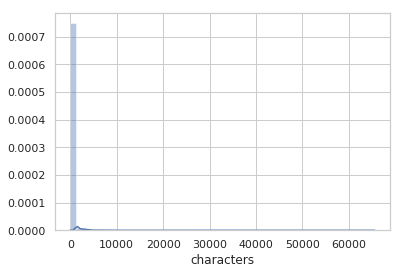

In [10]:
sns.distplot(df['characters'])

In [11]:
df['characters'].describe()

count    114445.000000
mean        135.869675
std         515.457870
min           1.000000
25%          21.000000
50%          40.000000
75%          94.000000
max       65536.000000
Name: characters, dtype: float64

In [12]:
#pad sequences that are bigger than maxlen
maxlen = 1000
X = sequence.pad_sequences(X, maxlen=maxlen)
print(X.shape)

(114444, 1000)


# Train-test split and oversampling

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

In [14]:
X_train.shape

(80110, 1000)

# Balancing

In [15]:
#oversampling with SMOTE
#sm = SMOTE(random_state=42)
#X_train, y_train = sm.fit_resample(X_train, y_train)
#X_train.shape

In [16]:
#UNDERSAMPLING
y_train = np.array(y_train)

#separate classes
pos_mask = y_train == 1 
y_pos = y_train[pos_mask]
X_pos = X_train[pos_mask]

neg_mask = y_train == 0 
y_neg = y_train[neg_mask]
X_neg = X_train[neg_mask]

#selects a random sample of negative patterns to match the negative class (most abundant)
np.random.seed(42)

idx = np.random.randint(y_neg.shape[0], size = y_pos.shape[0])
y_sampled = y_neg[idx]
X_sampled = X_neg[idx]
#concatena a amostra de padrões negativos com os padrões positivos
y_train = np.concatenate((y_pos,y_sampled),axis=0)
X_train = np.concatenate((X_pos,X_sampled),axis=0)

#shuffle
indices = np.random.permutation(X_train.shape[0])
X_train = X_train[indices]
y_train = y_train[indices]

print('balanced data:', y_train.shape)

balanced data: (4614,)


# Build model

In [32]:
#hyperparameters:
max_features = 2000 #726 #196921 #corrigir
batch_size = 32
embedding_dims = 100
filters = 250
kernel_size = 15
hidden_dims = 250
epochs = 12

In [33]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions

#variar
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Build model...


In [34]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs)#,
          #validation_data=(X_test, y_test))

Epoch 1/12
4614/4614 [==============================] - 114s 25ms/step - loss: 0.4074 - acc: 0.8147
Epoch 2/12
4614/4614 [==============================] - 120s 26ms/step - loss: 0.3209 - acc: 0.8611
Epoch 3/12
4614/4614 [==============================] - 141s 31ms/step - loss: 0.2804 - acc: 0.8830
Epoch 4/12
4614/4614 [==============================] - 131s 28ms/step - loss: 0.2582 - acc: 0.8975
Epoch 5/12
4614/4614 [==============================] - 130s 28ms/step - loss: 0.1636 - acc: 0.9432
Epoch 6/12
4614/4614 [==============================] - 121s 26ms/step - loss: 0.0916 - acc: 0.9690
Epoch 7/12
4614/4614 [==============================] - 137s 30ms/step - loss: 0.0331 - acc: 0.9913
Epoch 8/12
4614/4614 [==============================] - 150s 33ms/step - loss: 0.0154 - acc: 0.9978
Epoch 9/12
4614/4614 [==============================] - 138s 30ms/step - loss: 0.0069 - acc: 0.9996
Epoch 10/12
4614/4614 [==============================] - 134s 29ms/step - loss: 0.0051 - acc: 0.9996

In [39]:
y_prob = model.predict(X_test)
y_pred = [0 if x < 0.5 else 1 for x in y_prob]

              precision    recall  f1-score   support

           0       1.00      0.88      0.93     33345
           1       0.17      0.85      0.29       989

    accuracy                           0.88     34334
   macro avg       0.58      0.87      0.61     34334
weighted avg       0.97      0.88      0.92     34334

AUC:  0.9443209992781596


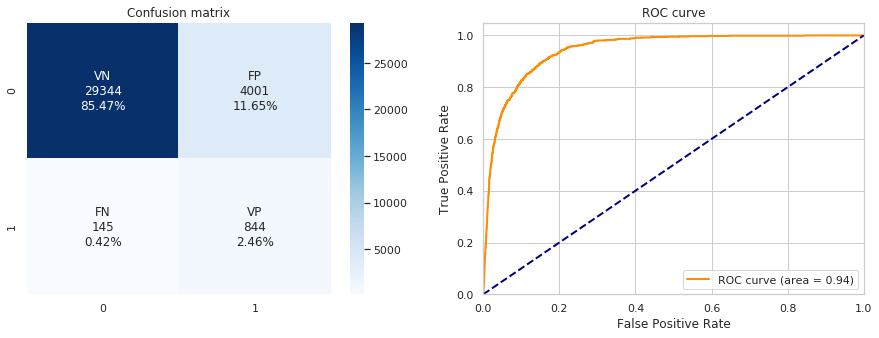

In [40]:
acc, precision, recall, f1, roc_auc = getTestMetrics(y_test, y_pred, y_prob)

# Separated embedding layer

In [ ]:
# specifying the input shape
no_docs = len(X_train)
input=Input(shape=(no_docs,maxlen),dtype='float64')

'''
shape of input. 
each document has 12 element or words which is the value of our maxlen variable.
'''

word_input=Input(shape=(maxlen,),dtype='float64')  

# creating the embedding
word_embedding=Embedding(input_dim = max_features, output_dim = embedding_dims, input_length=maxlen)(word_input)

word_vec=Flatten()(word_embedding) # flatten
embed_model =Model([word_input],word_vec) # combining all into a Keras model